In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df=pd.read_csv('Datasets/boston.csv')

Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [3]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [4]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Figure size 640x480 with 0 Axes>

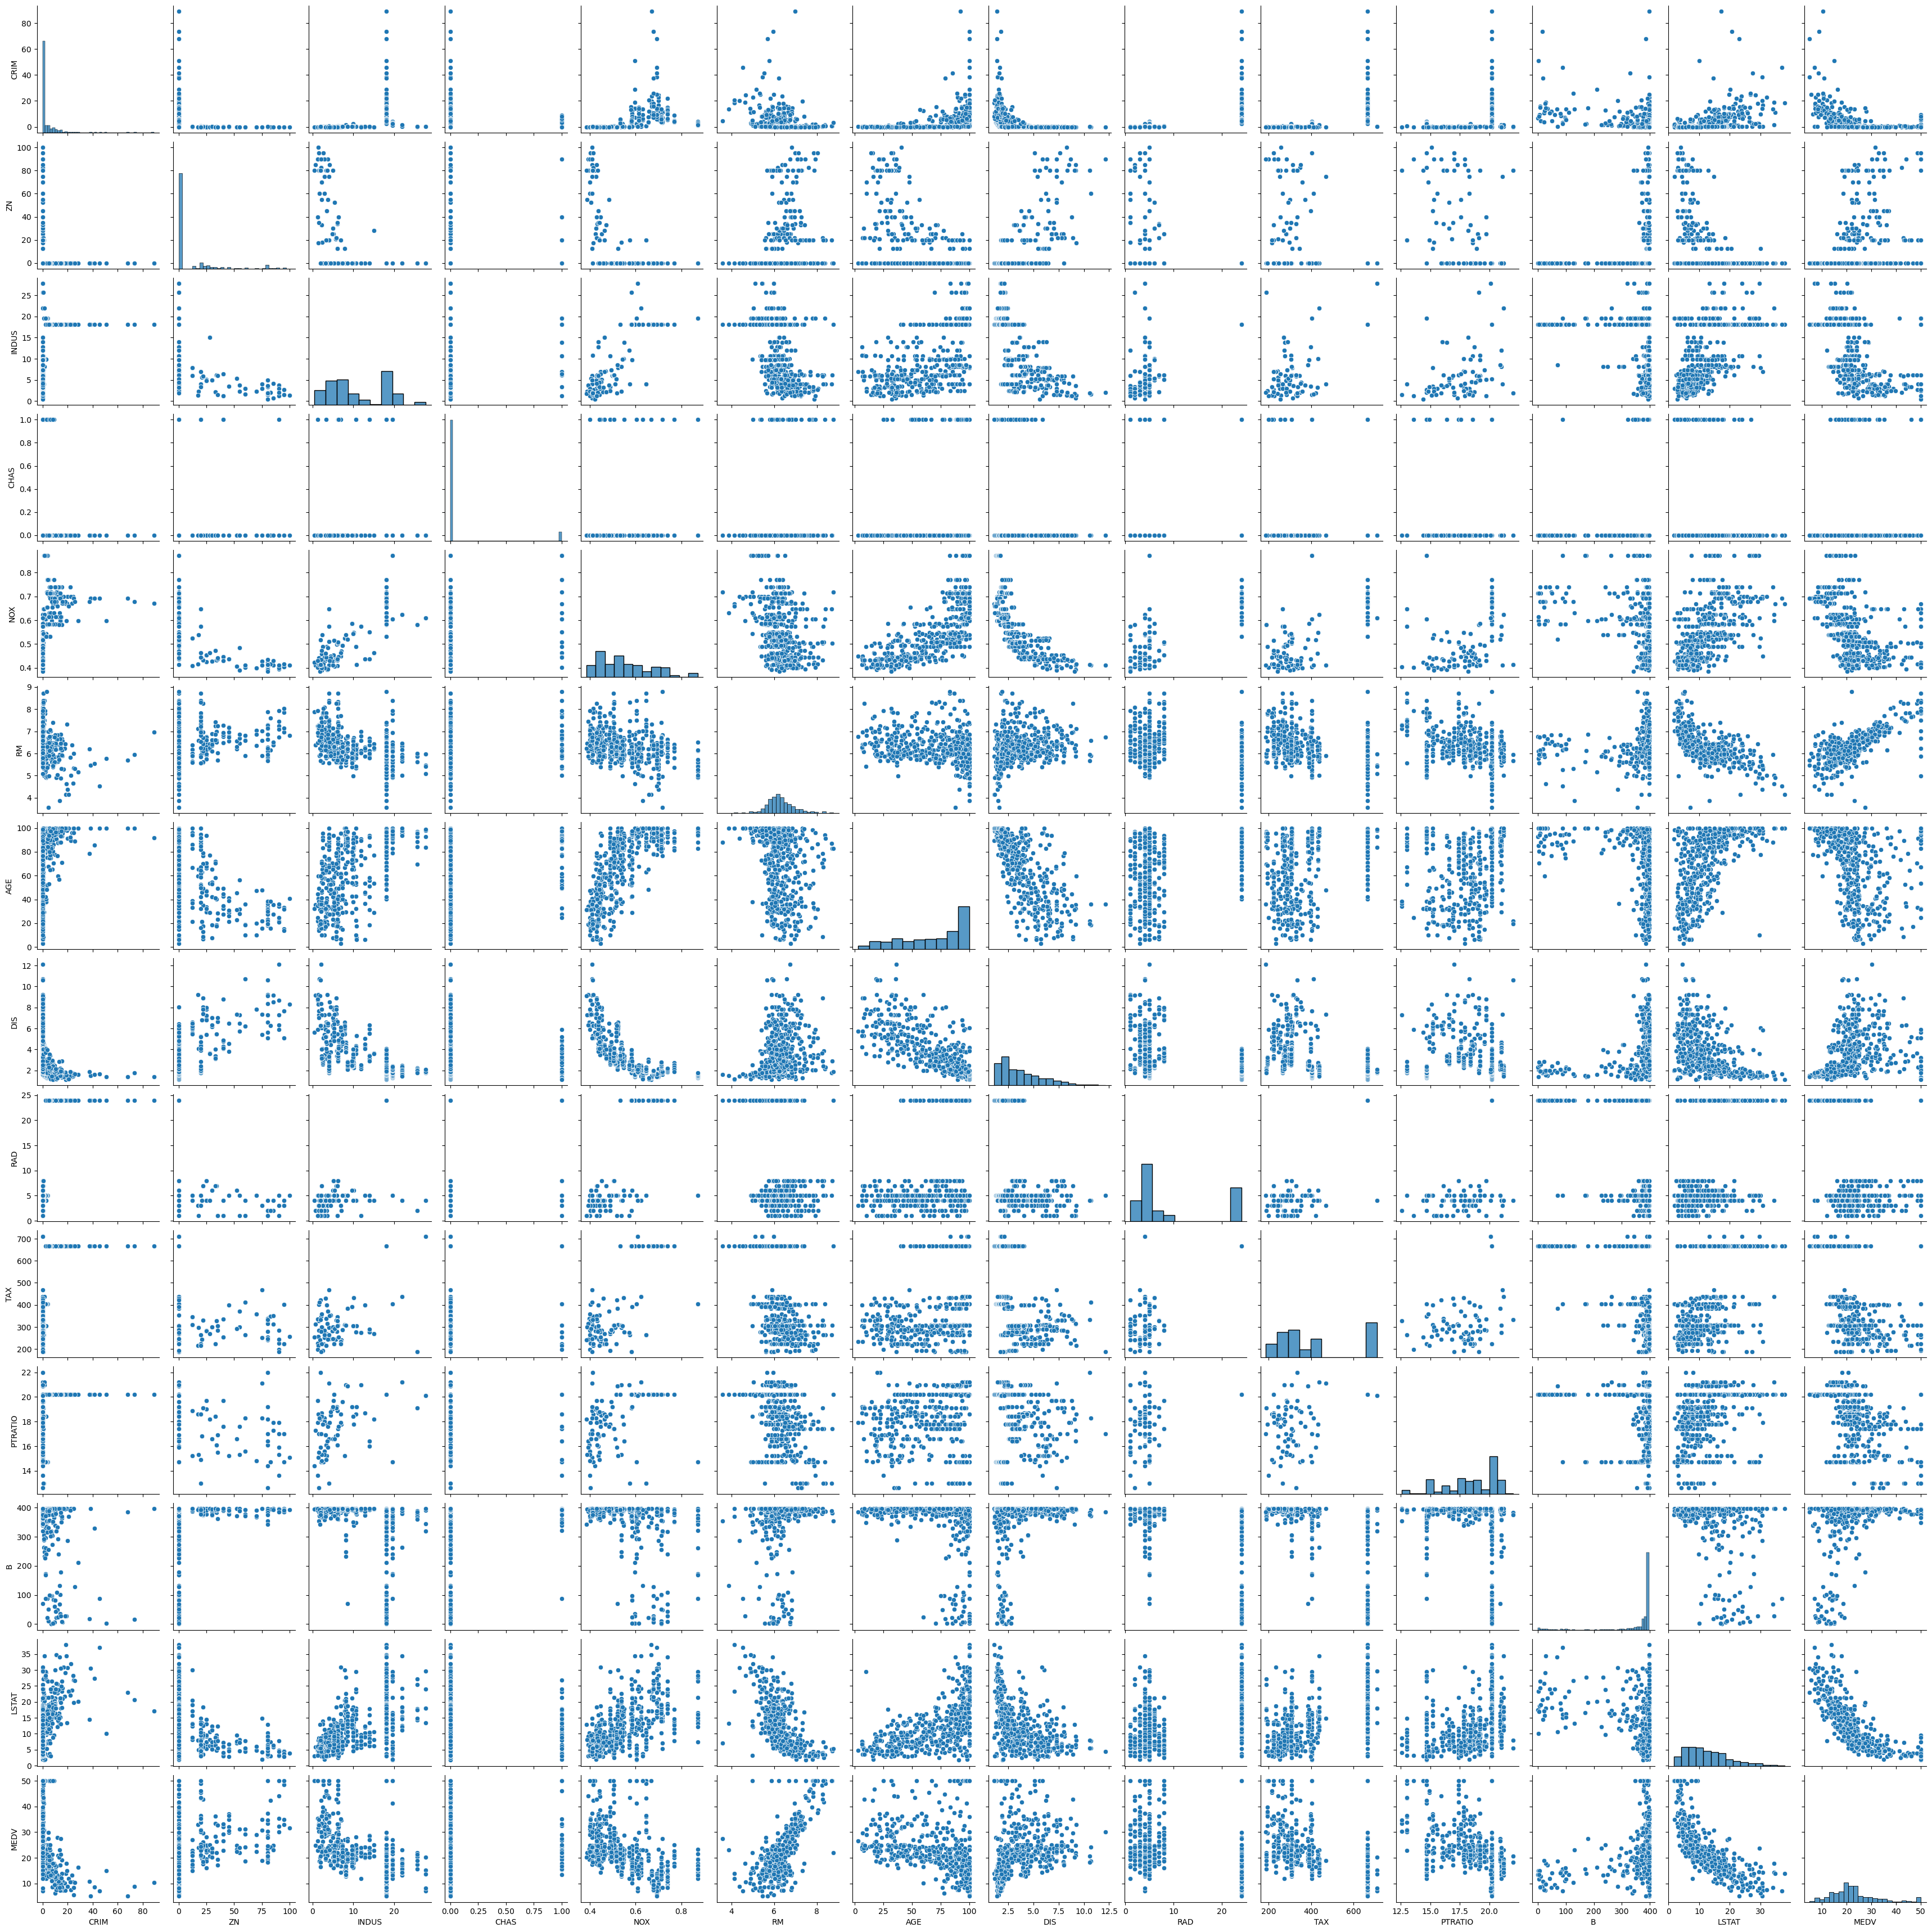

In [7]:
plt.figure()
sns.pairplot(df)

<Axes: >

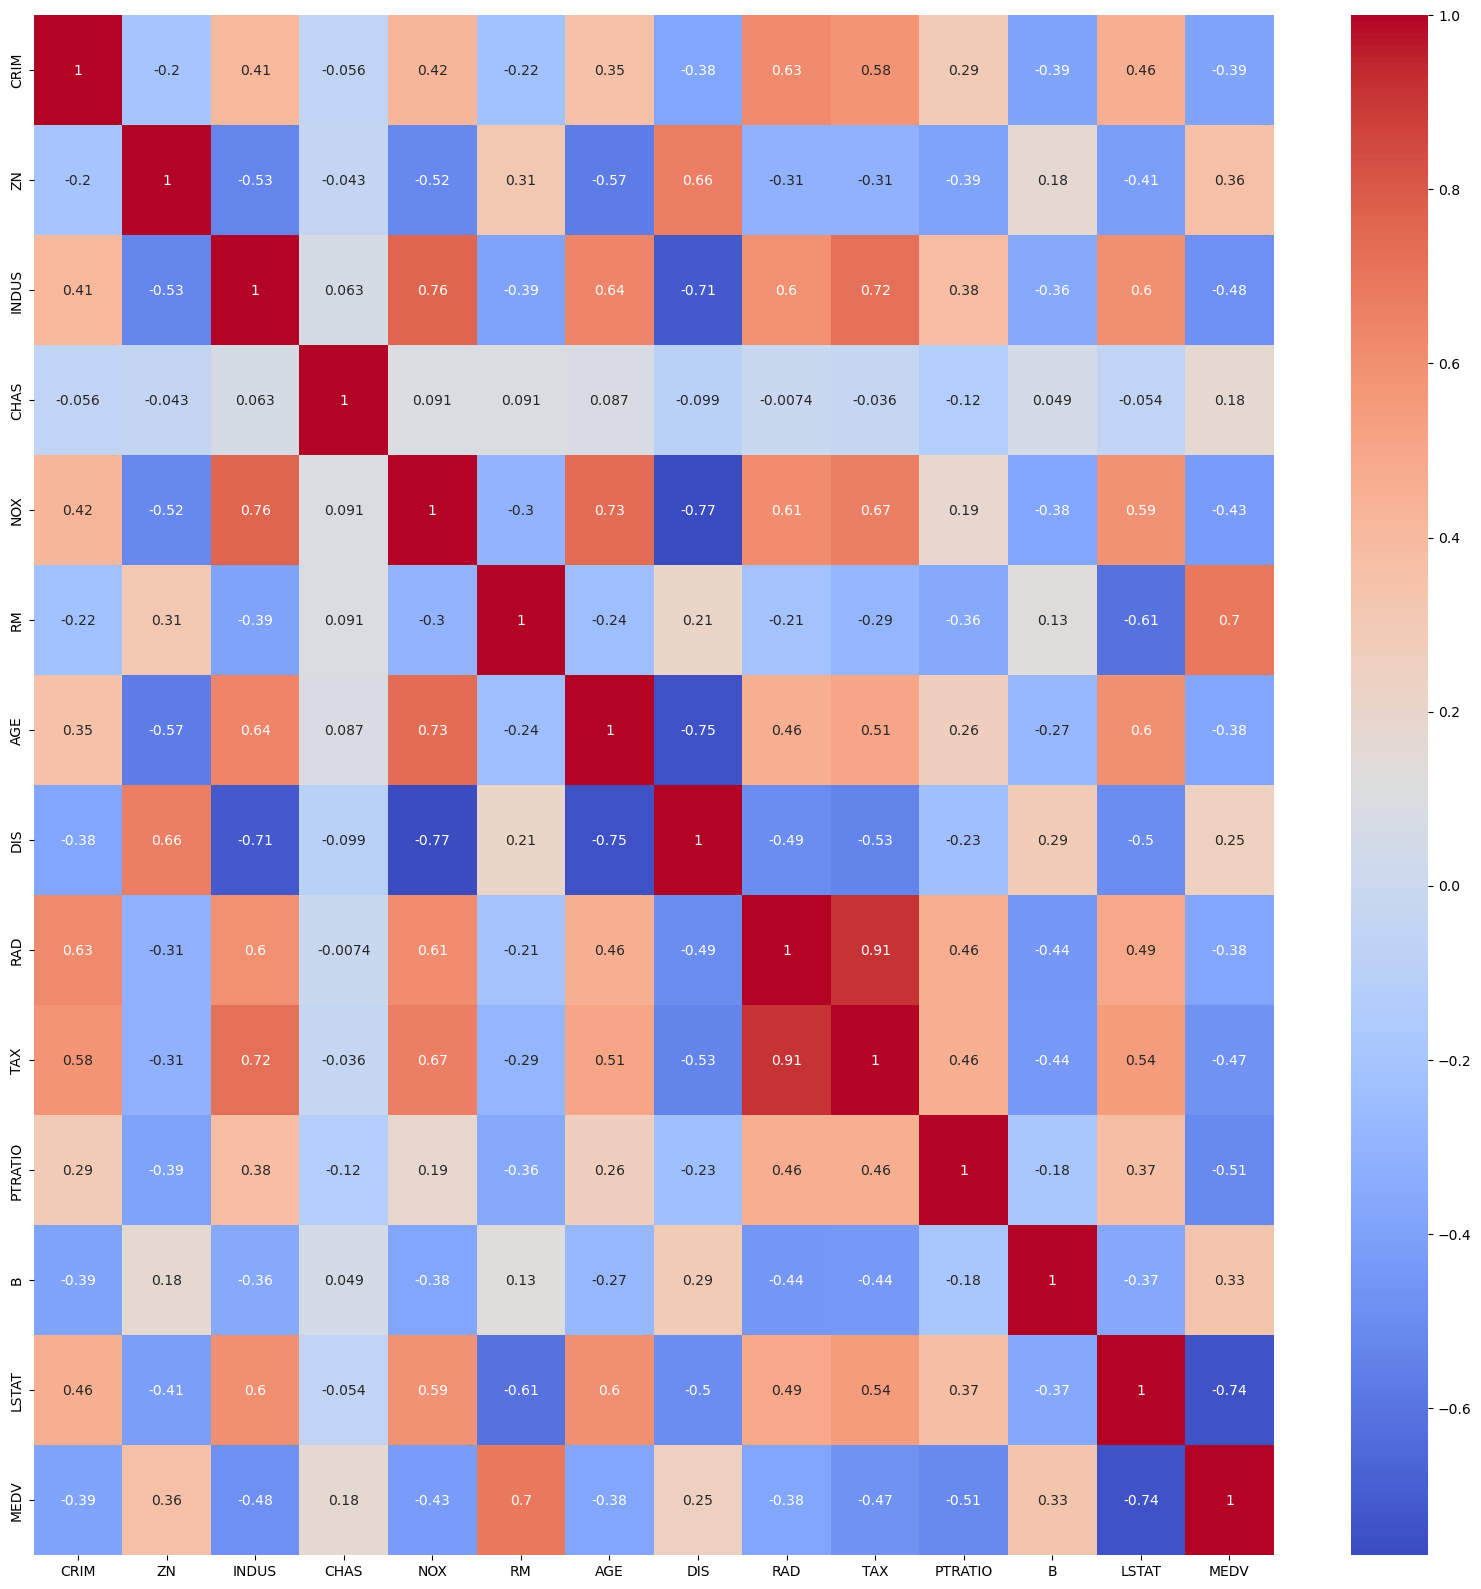

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [54]:
# x=df[['RM','LSTAT']]
x=df[['RM','LSTAT','PTRATIO','INDUS','TAX']]  # this is the best
# x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
#        'PTRATIO', 'B', 'LSTAT']]
y=df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [55]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [56]:
predictions = lm.predict(x_test)

In [57]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
cdf

Coeff
RM       3.713687
LSTAT   -0.642497
PTRATIO -0.791306
INDUS    0.119573
TAX     -0.004539

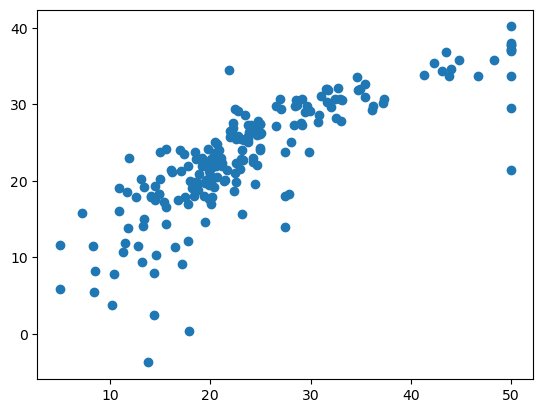

In [58]:
plt.scatter(y_test,predictions)

In [59]:
def adjusted_r2(r2, n, k):
    return 1 - (1-r2)*(n-1)/(n-k-1)
print(metrics.root_mean_squared_error(y_test,predictions))
r2=metrics.r2_score(y_test, predictions)
print(r2)
print(adjusted_r2(r2, len(predictions), x_test.shape[1]))

5.86638191545011
0.6485678091892721
0.6396482104377308


In [60]:
def evaluate_model(x, y, test_size=0.4, random_state=101):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)
    model = LinearRegression().fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    rmse = metrics.root_mean_squared_error(y_test, predictions)
    r2 = metrics.r2_score(y_test, predictions)
    adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
    
    return rmse, r2, adj_r2

# Example usage
for features in [
    ['RM','LSTAT'],
    ['RM','LSTAT','PTRATIO','INDUS','TAX'],
    ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
]:
    rmse, r2, adj_r2 = evaluate_model(df[features], df['MEDV'])
    print(features, "-> RMSE:", rmse, "R²:", r2, "Adj R²:", adj_r2)


['RM', 'LSTAT'] -> RMSE: 6.238742389666769 R²: 0.60253858004819 Adj R²: 0.598563965848672
['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX'] -> RMSE: 5.86638191545011 R²: 0.6485678091892721 Adj R²: 0.6396482104377308
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] -> RMSE: 5.423685598138306 R²: 0.6996069461015078 Adj R²: 0.6789449900132516
